In [1]:
import datetime
import json
import numpy
from pandas.io.json import json_normalize
from time import time
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as sp
from plotly import figure_factory as ff
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

In [2]:
df_user=pd.read_csv("yelp_academic_dataset_user.csv",encoding='latin-1') 

In [2]:
 df_user_class=pd.read_csv('df_user_class_1.csv',encoding='latin-1') 

In [424]:
 df_user_class=pd.read_csv('df_user_class_2.csv',encoding='latin-1') 

In [3]:
 df_user_class=pd.read_csv('wicoxon classification.csv',encoding='latin-1') 

# Build up user features

In [4]:
def filter_user(df,n,m):
    return df[(df['review_count']>n )&(df['review_count']<m)]

In [5]:
len(df_user_class)

26351

## 1. Change yelping_since to number of years
The yelp dataset is due to 30th June 2017. Therefore, the yelping_age will be the number of year from yelping_since to 30th June 2017

In [4]:
df_user.yelping_since=pd.to_datetime(df_user.yelping_since) #Convert the yelping_since from str to date
end_date=datetime.datetime(2017,6,30) #Setup the end point of yelping
df_user['yelping_age']=end_date-df_user.yelping_since #Calculate users yelping age

## 2. Change friends to number of friends

In [5]:
def count_friends(row):
    return len(row.friends.split(','))

In [6]:
df_user['num_friends']=df_user.apply(lambda row: count_friends(row), axis=1)

## 3. change elite to several features

#### 1. change elite to number of times been elite

In [7]:
def count_elite(x):
    a=x.replace("'","").strip('[]').split(',')
    if a==['None']:
        return 0
    else:
        return len(a)

In [8]:
df_user['num_elite']=df_user.elite.apply(lambda x: count_elite(x))

## 4. user_ratings list

In [10]:
def ratings_list(x):
    a=x.replace("'","").strip('[]').split(',')
    return list(map(float,a))
        

In [11]:
df_user_class['ratings']=df_user_class.stars.apply(lambda x: ratings_list(x))

In [15]:
df_user_class

,Unnamed: 0,user_id,stars,cum_rating,review_count,user_class,ratings
0,0,---1lKK3aKOuomHnwAkAow,"[4.0, 4.0, 5.0, 1.0, 1.0, 5.0, 5.0, 1.0, 3.0, ...","[4.0, 4.0, 4.5, 3.5, 3.5, 4.5, 4.5, 2.5, 3.5, ...",100,0,"[4.0, 4.0, 5.0, 1.0, 1.0, 5.0, 5.0, 1.0, 3.0, ..."
1,1,--2vR0DIsmQ6WfcSzKWigw,"[3.0, 5.0, 4.0, 3.0, 4.0, 5.0, 4.0, 5.0, 3.0, ...","[2.5, 3.5, 3.0, 4.0, 4.0, 4.5, 3.0, 4.5, 4.0, ...",28,1,"[3.0, 5.0, 4.0, 3.0, 4.0, 5.0, 4.0, 5.0, 3.0, ..."
2,2,--4rAAfZnEIAKJE80aIiYg,"[1.0, 3.0, 4.0, 1.0, 1.0, 4.0, 5.0, 1.0, 1.0, ...","[3.0, 3.5, 4.0, 3.5, 2.5, 4.0, 4.5, 3.5, 3.5, ...",22,1,"[1.0, 3.0, 4.0, 1.0, 1.0, 4.0, 5.0, 1.0, 1.0, ..."
3,3,--CIuK7sUpaNzalLAlHJKA,"[4.0, 1.0, 4.0, 4.0, 5.0, 4.0, 4.0, 3.0, 4.0, ...","[4.0, 3.0, 3.5, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, ...",27,0,"[4.0, 1.0, 4.0, 4.0, 5.0, 4.0, 4.0, 3.0, 4.0, ..."
4,4,--Qh8yKWAvIP4V4K8ZPfHA,"[4.0, 1.0, 2.0, 4.0, 5.0, 1.0, 4.0, 3.0, 2.0, ...","[4.0, 3.0, 3.0, 3.5, 4.5, 1.0, 4.0, 3.5, 4.0, ...",342,1,"[4.0, 1.0, 2.0, 4.0, 5.0, 1.0, 4.0, 3.0, 2.0, ..."
5,5,--RlSfc-QmcHFGHyX6aVjA,"[3.0, 4.0, 4.0, 5.0, 2.0, 4.0, 5.0, 4.0, 3.0, ...","[4.0, 4.5, 4.0, 4.5, 3.5, 4.0, 4.5, 4.0, 3.0, ...",77,1,"[3.0, 4.0, 4.0, 5.0, 2.0, 4.0, 5.0, 4.0, 3.0, ..."
6,6,--YhjyV-ce1nFLYxP49C5A,"[5.0, 3.0, 3.0, 4.0, 1.0, 5.0, 3.0, 3.0, 1.0, ...","[3.0, 4.0, 3.5, 2.5, 4.0, 4.0, 3.5, 4.0, 2.0, ...",26,0,"[5.0, 3.0, 3.0, 4.0, 1.0, 5.0, 3.0, 3.0, 1.0, ..."
7,7,--ZNfWKj1VyVElRx6-g1fg,"[5.0, 4.0, 5.0, 5.0, 3.0, 5.0, 5.0, 5.0, 5.0, ...","[3.5, 4.0, 3.5, 4.0, 3.0, 4.5, 3.5, 4.5, 4.0, ...",25,0,"[5.0, 4.0, 5.0, 5.0, 3.0, 5.0, 5.0, 5.0, 5.0, ..."
8,8,--_WPY2SoNRJGVtUr2ZcwQ,"[2.0, 5.0, 1.0, 5.0, 5.0, 2.0, 2.0, 4.0, 5.0, ...","[3.5, 4.0, 4.0, 4.0, 4.0, 3.0, 3.5, 2.5, 3.5, ...",32,1,"[2.0, 5.0, 1.0, 5.0, 5.0, 2.0, 2.0, 4.0, 5.0, ..."
9,9,--ty7Z9fEt08E3dS3_qoSA,"[5.0, 4.0, 4.0, 4.0, 3.0, 4.0, 5.0, 4.0, 4.0, ...","[3.5, 4.0, 4.0, 3.0, 3.5, 3.5, 4.0, 4.0, 3.5, ...",28,1,"[5.0, 4.0, 4.0, 4.0, 3.0, 4.0, 5.0, 4.0, 4.0, ..."


# match confidently taged users from all users

### df_tag_user1 contrarian users have:
1. more than 65% contrarian reviews 
2. overall more than 3 reviews

In [10]:
x=df_user_class.copy()
#x=df_user_class
del x['review_count'] #follow the review_count from the original dataset
del x['stars']
del x['cum_rating']
del x['Unnamed: 0']
df_tag_user1=pd.merge(left=x, right=df_user,how='left',on='user_id')
del df_tag_user1['type']
del df_tag_user1['Unnamed: 0']
del df_tag_user1['name']
del df_tag_user1['friends']
del df_tag_user1['elite']
#del df_tag_user1['average_stars']

In [56]:
x.user_class.value_counts()

0    15928
1    10423
Name: user_class, dtype: int64

In [168]:
int(df_tag_user1.yelping_since[0].year)

2007

In [11]:
df_tag_user1['yelping_age']=df_tag_user1.yelping_age.apply(lambda x: (x / np.timedelta64(1, 'D')).astype(int))

In [12]:
df_tag_user1['yelping_since']=df_tag_user1.yelping_since.apply(lambda x: int(x.year))

In [123]:
df_tag_user1['yelping_since']=df_tag_user1.yelping_since.apply(lambda x: str(x))
df_tag_user1['yelping_age']=df_tag_user1.yelping_age.apply(lambda x: str(x))

# Try machine learning models to do classification

## 1. convert label encoding

In [12]:
data=df_tag_user1.ix[:, df_tag_user1.columns != 'user_class'].copy()
del data['user_id']
#one_hot_tag_user_1=pd.get_dummies(X,columns=X.columns)

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns.values:
    if col=='ratings':
        continue
   # Encoding only categorical variables

    if data[col].dtypes=='O':
   # Using whole data to form an exhaustive list of levels
        le.fit(data[col].values)
        data[col]=le.transform(data[col])

Train, validation data separation

In [14]:
Y=df_tag_user1.user_class.copy()
train_data=data[0:20000]
train_label=Y[0:20000]
validation_data=data[20001:]
validation_label=Y[20001:]

## 2. Apply Machine Learning

In [236]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],decimals=3)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [35]:
def feed_ratings(train_data,train_label,validation_data,validation_label,model,title):
    precision_0=[]
    precision_1=[]
    precision_2=[]
    for i in np.arange(0.1,1,0.1):
        a=train_data.copy()
        b=validation_data.copy()
        a['ratings']=a.ratings.apply(lambda x: np.average(x[:int(np.ceil(i*len(x)))]))
        b['ratings']=b.ratings.apply(lambda x: np.average(x[:int(np.ceil(i*len(x)))]))
        model.fit(a,train_label)
        precision, recall, fscore, support = score(validation_label, model.predict(b))
        precision_0.append(precision[0])
        precision_1.append(precision[1])
    plt.plot(precision_0,label='label 0')
    plt.plot(precision_1,label='label 1')
    plt.legend(loc="lower right")
    plt.xlabel('portion of ratings')
    plt.ylabel('precision')
    plt.title(title)

## Performances

In [37]:
from sklearn.metrics import classification_report,accuracy_score

In [25]:
x.user_class.value_counts()

0    15928
1    10423
Name: user_class, dtype: int64

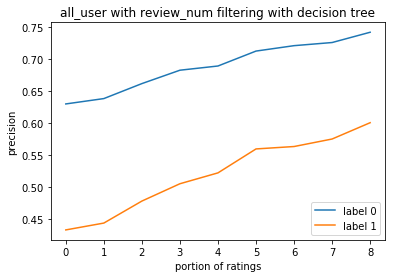

In [36]:
feed_ratings(train_data,train_label,validation_data,validation_label,clf,'decision tree')

In [86]:
feed_ratings(train_data,train_label,validation_data,validation_label,rf,'random forest')

AttributeError: 'DataFrame' object has no attribute 'ratings'

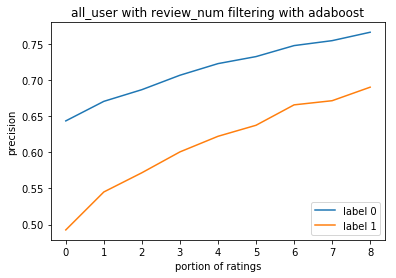

In [42]:
feed_ratings(train_data,train_label,validation_data,validation_label,adaboost,'adaboost')

In [72]:
print(classification_report(validation_label,clf.predict(validation_data)))

             precision    recall  f1-score   support

          0       0.72      0.74      0.73      6860
          1       0.58      0.57      0.58      4490

avg / total       0.67      0.67      0.67     11350



In [73]:
print(classification_report(validation_label,rf.predict(validation_data)))

             precision    recall  f1-score   support

          0       0.72      0.86      0.79      6860
          1       0.70      0.49      0.58      4490

avg / total       0.71      0.72      0.70     11350



In [75]:
print(classification_report(validation_label,adaboost.predict(validation_data)))

             precision    recall  f1-score   support

          0       0.74      0.80      0.77      6860
          1       0.65      0.57      0.61      4490

avg / total       0.70      0.71      0.71     11350



In [89]:
#Gradient Boosting
print(classification_report(validation_label,g.predict(validation_data)))

             precision    recall  f1-score   support

          0       0.75      0.85      0.80      6860
          1       0.72      0.57      0.64      4490

avg / total       0.74      0.74      0.74     11350



In [74]:
accuracy_score(clf.predict(validation_data),validation_label)

0.66933920704845817

In [76]:
accuracy_score(rf.predict(validation_data),validation_label)

0.71621145374449335

In [77]:
accuracy_score(adaboost.predict(validation_data),validation_label)

0.70898678414096916

In [87]:
#Gradient Boosting
accuracy_score(g.predict(validation_data),validation_label)

0.74334801762114533

### 1. Decision Tree

In [200]:
from sklearn import tree
import itertools

In [234]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
precision, recall, fscore, support = score(validation_label, clf.predict(validation_data))

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

Confusion Matrix

Normalized confusion matrix
[[ 0.714  0.286]
 [ 0.434  0.566]]


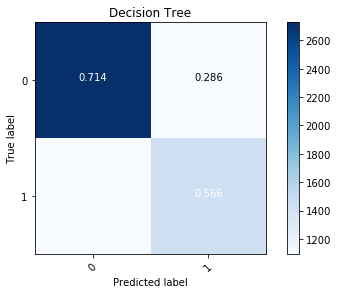

In [237]:
clf_matrix=confusion_matrix(clf.predict(validation_data),validation_label)
plot_confusion_matrix(clf_matrix, classes=['0','1'],normalize=1,
                      title='Decision Tree')

Score

### 2. Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
# Create a random forest classifier. By convention, clf means 'classifier'
rf = RandomForestClassifier(n_jobs=2)

# Train the classifier to take the training features and learn how they relate
# to the training y (the species)
rf.fit(train_data,train_label)
precision, recall, fscore, support = score(validation_label, rf.predict(validation_data))

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

Normalized confusion matrix
[[ 0.722  0.278]
 [ 0.299  0.701]]


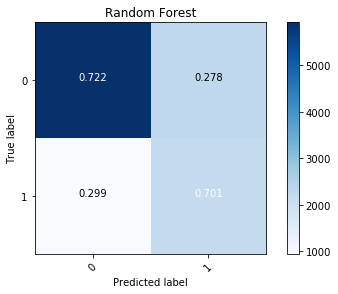

In [92]:
rf_matrix=confusion_matrix(rf.predict(validation_data),validation_label)
plot_confusion_matrix(rf_matrix, classes=['0','1'],normalize=1,
                      title='Random Forest')

### 3. ada booster

In [199]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
rng = np.random.RandomState(1)
adaboost = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)
#adaboost.fit(train_data,train_label )



In [78]:
adaboost.feature_importances_

array([ 0.16230884,  0.01281414,  0.01527937,  0.01979671,  0.03236569,
        0.01508931,  0.01994646,  0.0318387 ,  0.02806147,  0.04741122,
        0.02033836,  0.035871  ,  0.04276523,  0.03444918,  0.05396734,
        0.1018467 ,  0.06626523,  0.0887802 ,  0.08723148,  0.06158916,
        0.02198421])

Normalized confusion matrix
[[ 0.741  0.259]
 [ 0.35   0.65 ]]


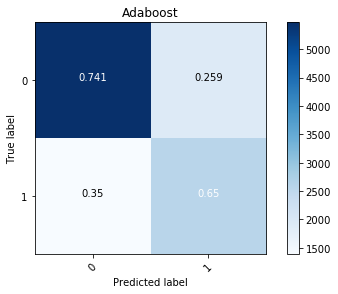

In [93]:
ad_matrix=confusion_matrix(adaboost.predict(validation_data),validation_label)
plot_confusion_matrix(ad_matrix, classes=['0','1'],normalize=1,
                      title='Adaboost')

In [198]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

In [67]:
del train_data['ratings']
del validation_data['ratings']

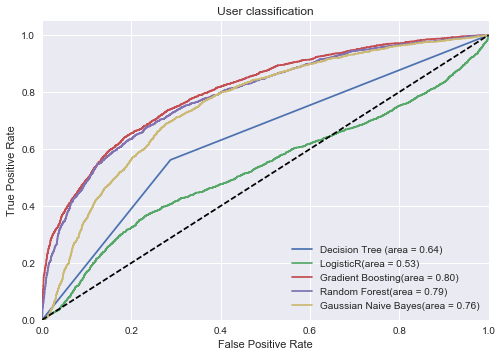

In [221]:
t = tree.DecisionTreeClassifier().fit(train_data,train_label)
d = LogisticRegression().fit(train_data,train_label)
g = GradientBoostingClassifier(learning_rate=0.2).fit(train_data,train_label)
r = RandomForestClassifier(n_estimators=100,n_jobs=-1, oob_score = 1,min_samples_leaf=100).fit(train_data,train_label)
gnb = GaussianNB().fit(train_data,train_label)

fpr_t, tpr_t, _ = roc_curve(validation_label, t.predict_proba(validation_data)[:,1])
roc_auc_t = auc(fpr_t, tpr_t)

fpr_d, tpr_d, _ = roc_curve(validation_label, d.predict_proba(validation_data)[:,1])
roc_auc_d = auc(fpr_d, tpr_d)

fpr_g, tpr_g, _ = roc_curve(validation_label, g.predict_proba(validation_data)[:,1])
roc_auc_g = auc(fpr_g, tpr_g)

fpr_r, tpr_r, _ = roc_curve(validation_label, r.predict_proba(validation_data)[:,1])
roc_auc_r = auc(fpr_r, tpr_r)

fpr_gnb, tpr_gnb, _ = roc_curve(validation_label, gnb.predict_proba(validation_data)[:,1])
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

plt.figure()
plt.plot(fpr_t, tpr_t, label='Decision Tree (area = %0.2f)' % roc_auc_t)
plt.plot(fpr_d, tpr_d, label='LogisticR(area = %0.2f)' % roc_auc_d)
plt.plot(fpr_g, tpr_g, label='Gradient Boosting(area = %0.2f)' % roc_auc_g)
plt.plot(fpr_r, tpr_r, label='Random Forest(area = %0.2f)' % roc_auc_r)
plt.plot(fpr_gnb, tpr_gnb, label='Gaussian Naive Bayes(area = %0.2f)' % roc_auc_gnb)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('User classification')
plt.legend(loc="lower right")
plt.show()

## 1. correlations among contineous variables

In [229]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
def vif_cal(data,cols,amount):
    features="+".join(cols)
    cols.append('user_class')
    df=data[cols]
    df=df[:amount]
    y, X = dmatrices('user_class ~' + features, df, return_type='dataframe')
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif
def develop_vif(df,cols,amount,threshold):
    vif=vif_cal(df,cols,amount)
    while(max(vif['VIF Factor'])>5):
        vif=vif.sort(['VIF Factor'])
        vif=vif[:-1]
        cols=list(vif.features)
        if 'Intercept' in cols:
            cols.remove('Intercept')
        vif=vif_cal(df,cols,amount)
        
    return vif
co=['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'fans', 'funny', 'num_friends', 'num_elite']
develop_vif(df,co,1000,5)

/Users/stevezhang/anaconda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning:

divide by zero encountered in double_scalars

/Users/stevezhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



KeyboardInterrupt: 

## Feature selection

In [59]:
del data['ratings']

### variance threshold

In [21]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

In [139]:
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
scaler.fit(data)
a=scaler.transform(data)


In [67]:
scaler.var_

array([  2.09257153e-01,   1.18907543e+05,   7.85057766e+02,
         1.18907543e+05,   1.11308383e+05,   2.11051298e+02,
         8.79953277e+02,   9.33326247e+04,   8.68291230e+04,
         1.18404490e+05,   1.25218107e+03,   1.73056839e+04,
         6.53425359e+06,   2.78023924e+03,   3.15190248e+06,
         8.61384615e+04,   7.51715089e+06,   6.51126047e+05,
         8.86508746e+05,   1.61310437e+05,   5.23179019e+00])

In [136]:
a

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.34285714],
       [ 0.        ,  0.6       ],
       [ 0.        ,  0.4       ],
       [ 0.        ,  1.        ],
       [ 0.        ,  0.02857143]])

In [142]:
b=[]
c=[]
for j in range(0,20):
    b=[]
    for i in range(0, len(a)):
        b.append(a[i][j]) 
    c.append(np.var(b))

### Recursive Feature Elimination

In [37]:
from sklearn.feature_selection import RFE

#### Naive Bayes

#### 1. Logistic Regression

In [38]:
def rfe_feature(data,label,model,num):
    X = data
    Y = label
    rfe = RFE(model, num)
    fit = rfe.fit(X, Y)
    return data.columns[fit.support_],fit.ranking_


In [176]:
#lr
lr_features,lr_rankings=rfe_feature(train_data,train_label,LogisticRegression(),5)
#decision tree
dt_features,dt_rankings=rfe_feature(train_data,train_label,DecisionTreeClassifier(),5)
#random forest
rf_features,rf_rankings=rfe_feature(train_data,train_label,RandomForestClassifier(),5)
#adaboost
ad_features,ad_rankings=rfe_feature(train_data,train_label,AdaBoostClassifier(),5)
#gradient boost
gb_features,gb_rankings=rfe_feature(train_data,train_label,GradientBoostingClassifier(),5)

In [177]:
lr_features,dt_features,rf_features,ad_features,gb_features

(Index(['average_stars', 'compliment_list', 'compliment_more', 'fans',
        'num_elite'],
       dtype='object'),
 Index(['average_stars', 'review_count', 'useful', 'yelping_since',
        'num_friends'],
       dtype='object'),
 Index(['average_stars', 'review_count', 'yelping_since', 'yelping_age',
        'num_friends'],
       dtype='object'),
 Index(['average_stars', 'review_count', 'useful', 'yelping_since',
        'num_elite'],
       dtype='object'),
 Index(['average_stars', 'review_count', 'useful', 'yelping_since',
        'num_friends'],
       dtype='object'))

### performance after feature selection

#### Logistic Regression

In [207]:
lg=LogisticRegression().fit(train_data,train_label)
precision, recall, fscore, support = score(validation_label, lg.predict(validation_data))

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [ 0.60291527  0.42990654]
recall: [ 0.98405229  0.01821782]
fscore: [ 0.74771553  0.03495441]
support: [3825 2525]


In [367]:
lg.summary()

AttributeError: 'LogisticRegression' object has no attribute 'summary'

In [350]:
lr_train=train_data[['average_stars', 'compliment_list', 'compliment_more', 'fans',
        'num_elite']]
lr_validation=validation_data[['average_stars', 'compliment_list', 'compliment_more', 'fans',
        'num_elite']]

In [352]:
lr= LogisticRegression().fit(lr_train, train_label)
precision, recall, fscore, support = score(validation_label, lr.predict(lr_validation))

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [ 0.60252366  0.5       ]
recall: [ 0.99869281  0.0019802 ]
fscore: [ 0.75159862  0.00394477]
support: [3825 2525]


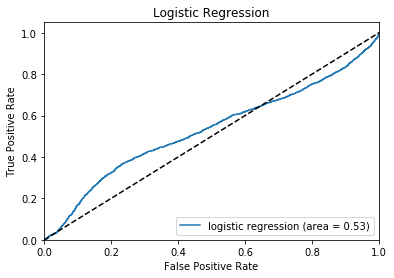

In [369]:
lr = LogisticRegression().fit(train_data,train_label)
flr=LogisticRegression().fit(lr_train,train_label)
fpr_lr, tpr_lr, _ = roc_curve(validation_label, lr.predict_proba(validation_data)[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_flr, tpr_flr, _ = roc_curve(validation_label, flr.predict_proba(lr_validation)[:,1])
roc_auc_flr = auc(fpr_flr, tpr_flr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label='logistic regression (area = %0.2f)' % roc_auc_lr)
#plt.plot(fpr_flr, tpr_flr, label='after feature selection (area = %0.2f)' % roc_auc_flr)


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### decision tree

#### before feature selection

In [201]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
precision, recall, fscore, support = score(validation_label, clf.predict(validation_data))

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [ 0.7195122   0.56904577]
recall: [ 0.70954248  0.5809901 ]
fscore: [ 0.71449256  0.57495591]
support: [3825 2525]


In [347]:
clf_feature=pd.DataFrame({'feature':train_data.columns,'importance':clf.feature_importances_})
clf_feature.sort('importance')

/Users/stevezhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,feature,importance
5,compliment_list,0.005188
2,compliment_cute,0.011462
10,compliment_profile,0.011821
20,num_elite,0.013348
3,compliment_funny,0.014318
1,compliment_cool,0.017840
8,compliment_photos,0.019172
4,compliment_hot,0.021201
6,compliment_more,0.021247
11,compliment_writer,0.029700


#### before feature selection

In [243]:
clf_train=train_data[['average_stars', 'review_count', 'useful', 'yelping_since',
        'num_friends']]
clf_validation=validation_data[['average_stars', 'review_count', 'useful', 'yelping_since',
        'num_friends']]

In [244]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(clf_train, train_label)
precision, recall, fscore, support = score(validation_label, clf.predict(clf_validation))

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [ 0.71792829  0.56595745]
recall: [ 0.70666667  0.57940594]
fscore: [ 0.71225296  0.57260274]
support: [3825 2525]


### Random Forest
#### before feature selection

In [286]:
%timeit

In [196]:
# Create a random forest classifier. By convention, clf means 'classifier'

rf = RandomForestClassifier(n_estimators=100,n_jobs=-1, oob_score = 1,min_samples_leaf=100)

# Train the classifier to take the training features and learn how they relate
# to the training y (the species)
rf.fit(train_data,train_label)
precision, recall, fscore, support = score(validation_label, rf.predict(validation_data))

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [ 0.72551085  0.76232065]
recall: [ 0.90039216  0.4839604 ]
fscore: [ 0.80354643  0.59205426]
support: [3825 2525]


In [370]:
rf_feature=pd.DataFrame({'feature':train_data.columns,'importance':rf.feature_importances_})
rf_feature.sort('importance')

/Users/stevezhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,feature,importance
0,average_stars,0.756026
15,review_count,0.069280
19,num_friends,0.021678
17,yelping_since,0.019387
16,useful,0.018070
18,yelping_age,0.015849
7,compliment_note,0.012888
14,funny,0.011609
9,compliment_plain,0.011170
12,cool,0.009382


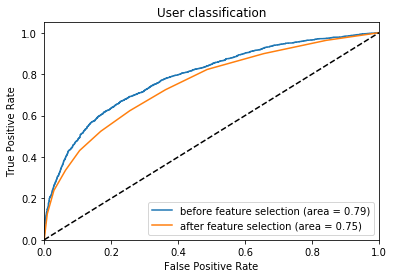

In [298]:
t = RandomForestClassifier(n_estimators=1000,n_jobs=-1, oob_score = 1,min_samples_leaf=100).fit(train_data,train_label)
ft=RandomForestClassifier().fit(rf_train,train_label)
fpr_t, tpr_t, _ = roc_curve(validation_label, t.predict_proba(validation_data)[:,1])
roc_auc_t = auc(fpr_t, tpr_t)

fpr_ft, tpr_ft, _ = roc_curve(validation_label, ft.predict_proba(rf_validation)[:,1])
roc_auc_ft = auc(fpr_ft, tpr_ft)

plt.figure()
plt.plot(fpr_t, tpr_t, label='before feature selection (area = %0.2f)' % roc_auc_t)
plt.plot(fpr_ft, tpr_ft, label='after feature selection (area = %0.2f)' % roc_auc_ft)


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('User classification')
plt.legend(loc="lower right")
plt.show()

#### after feature selection

In [253]:
rf_train=train_data[['average_stars', 'review_count', 'yelping_since', 'yelping_age',
        'num_friends']]
rf_validation=validation_data[['average_stars', 'review_count', 'yelping_since', 'yelping_age',
        'num_friends']]

In [254]:
# Create a random forest classifier. By convention, clf means 'classifier'
rf = RandomForestClassifier(n_jobs=2)

# Train the classifier to take the training features and learn how they relate
# to the training y (the species)
rf.fit(rf_train,train_label)
precision, recall, fscore, support = score(validation_label, rf.predict(rf_validation))

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [ 0.72537792  0.66834677]
recall: [ 0.82797386  0.52514851]
fscore: [ 0.77328775  0.58815702]
support: [3825 2525]


### gradient boosting

In [191]:
g = GradientBoostingClassifier(learning_rate=0.2).fit(train_data,train_label)
precision, recall, fscore, support = score(validation_label, g.predict(validation_data))

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [ 0.75969173  0.72340426]
recall: [ 0.85045752  0.59247525]
fscore: [ 0.80251634  0.65142608]
support: [3825 2525]


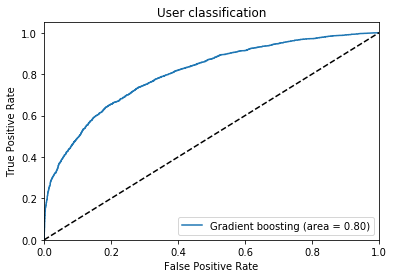

In [27]:
t = GradientBoostingClassifier(learning_rate=0.2).fit(train_data,train_label)
fpr_t, tpr_t, _ = roc_curve(validation_label, t.predict_proba(validation_data)[:,1])
roc_auc_t = auc(fpr_t, tpr_t)



plt.figure()
plt.plot(fpr_t, tpr_t, label='Gradient boosting (area = %0.2f)' % roc_auc_t)


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('User classification')
plt.legend(loc="lower right")
plt.show()

In [372]:
g_feature=pd.DataFrame({'feature':train_data.columns,'importance':g.feature_importances_})
g_feature.sort('importance',ascending=0)

/Users/stevezhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,feature,importance
0,average_stars,0.382302
15,review_count,0.140672
17,yelping_since,0.130636
16,useful,0.053744
14,funny,0.032659
19,num_friends,0.031914
9,compliment_plain,0.029120
11,compliment_writer,0.023282
13,fans,0.020568
5,compliment_list,0.017188


In [342]:
gb_feature=pd.DataFrame({'feature':train_data.columns,'importance':g.feature_importances_})
gb_feature.sort('importance')

### Naive_bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
X = train_data
y = train_label
gnb = GaussianNB()
gnb.fit(X, y)  
precision, recall, fscore, support = score(validation_label, gnb.predict(validation_data))

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [ 0.66005984  0.70558882]
recall: [ 0.92287582  0.28      ]
fscore: [ 0.76965006  0.40090729]
support: [3825 2525]


In [47]:
gnb.class_count_

array([ 12102.,   7898.])

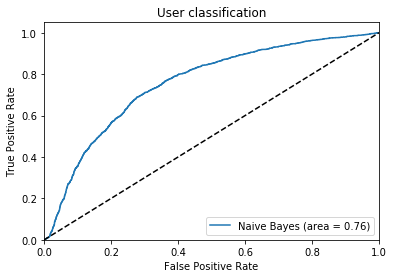

In [45]:
t = GaussianNB().fit(train_data,train_label)
fpr_t, tpr_t, _ = roc_curve(validation_label, t.predict_proba(validation_data)[:,1])
roc_auc_t = auc(fpr_t, tpr_t)



plt.figure()
plt.plot(fpr_t, tpr_t, label='Naive Bayes (area = %0.2f)' % roc_auc_t)


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('User classification')
plt.legend(loc="lower right")
plt.show()

/Users/stevezhang/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



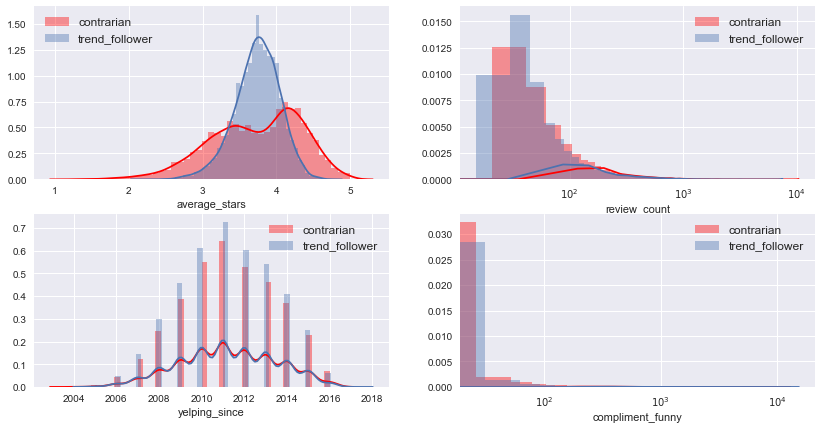

In [23]:
import seaborn as sns
fig=plt.figure(figsize=[14,7])
ax1=fig.add_subplot(221)
sns.distplot(df_tag_user1[df_tag_user1.user_class==1].average_stars,label='contrarian',color='r')
sns.distplot(df_tag_user1[df_tag_user1.user_class==0].average_stars,label='trend_follower',norm_hist=1)
plt.legend(prop={'size': 12 })
ax1=fig.add_subplot(222)
plt.xscale('log')
#plt.xlim(0,1500)
sns.distplot(df_tag_user1[df_tag_user1.user_class==1].review_count,label='contrarian',bins=500,color='r')
sns.distplot(df_tag_user1[df_tag_user1.user_class==0].review_count,label='trend_follower',bins=500)
plt.legend(prop={'size': 12 })
ax1=fig.add_subplot(223)
sns.distplot(df_tag_user1[df_tag_user1.user_class==1].yelping_since,label='contrarian',color='r')
sns.distplot(df_tag_user1[df_tag_user1.user_class==0].yelping_since,label='trend_follower')
plt.legend(prop={'size': 12 })
# plt.ylim(0,0.003)
# plt.xlim(0,500)
ax1=fig.add_subplot(224)
sns.distplot(df_tag_user1[df_tag_user1.user_class==1].compliment_funny,label='contrarian',bins=500,color='r')
sns.distplot(df_tag_user1[df_tag_user1.user_class==0].compliment_funny,label='trend_follower',bins=500)
plt.legend()
plt.xscale('log')
#plt.xlim(0,2000)
plt.legend( prop={'size': 12 })

/Users/stevezhang/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



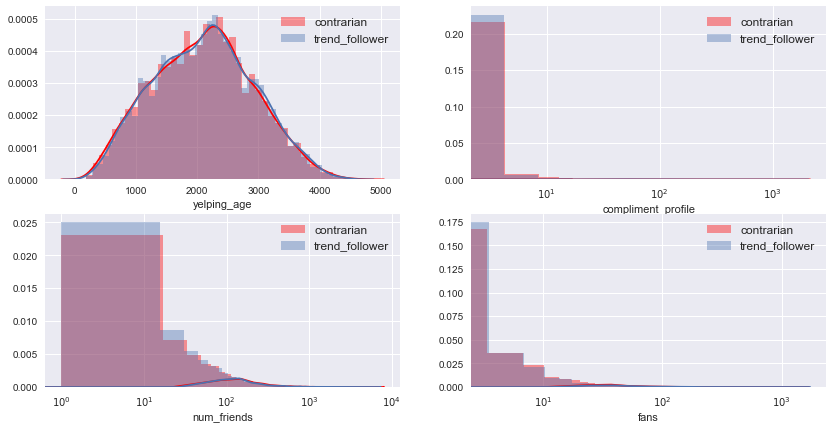

In [27]:
fig=plt.figure(figsize=[14,7])
ax2=fig.add_subplot(221)
sns.distplot(df_tag_user1[df_tag_user1.user_class==1].yelping_age,label='contrarian',color='r')
sns.distplot(df_tag_user1[df_tag_user1.user_class==0].yelping_age,label='trend_follower')
plt.legend( prop={'size': 12 })
#plt.ylim(0,0.0003)
ax2=fig.add_subplot(222)
sns.distplot(df_tag_user1[df_tag_user1.user_class==1].compliment_profile,bins=500,label='contrarian',color='r')
sns.distplot(df_tag_user1[df_tag_user1.user_class==0].compliment_profile,label='trend_follower',bins=500)
plt.xscale('log')
plt.legend( prop={'size': 12 })
ax2=fig.add_subplot(223)
sns.distplot(df_tag_user1[df_tag_user1.user_class==1].num_friends,label='contrarian',bins=500,color='r')
sns.distplot(df_tag_user1[df_tag_user1.user_class==0].num_friends,label='trend_follower',bins=500)
plt.xscale('log')
plt.legend( prop={'size': 12 })
# plt.ylim(0,0.0015)
# plt.xlim(0,3000)
ax2=fig.add_subplot(224)
# sns.distplot(df_tag_user1[df_tag_user1.user_class==1].num_elite,label='contrarian')
# sns.distplot(df_tag_user1[df_tag_user1.user_class==0].num_elite,label='trend_follower')
sns.distplot(df_tag_user1[df_tag_user1.user_class==1].fans,label='contrarian',bins=500,color='r')
sns.distplot(df_tag_user1[df_tag_user1.user_class==0].fans,label='trend_follower',bins=500)
plt.xscale('log')
plt.legend( prop={'size': 12 })

In [213]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
target_names = ['trend follower', 'contrarian']
#bayes
accuracy_score(validation_label, gnb.predict(validation_data))

0.667244094488189

In [211]:
print(classification_report(validation_label, gnb.predict(validation_data), target_names=target_names))

                precision    recall  f1-score   support

trend follower       0.66      0.92      0.77      3825
    contrarian       0.71      0.28      0.40      2525

   avg / total       0.68      0.67      0.62      6350



In [205]:
#gradient boosting
accuracy_score(validation_label, g.predict(validation_data))

0.74787401574803147

In [214]:
print(classification_report(validation_label, g.predict(validation_data), target_names=target_names))

                precision    recall  f1-score   support

trend follower       0.76      0.85      0.80      3825
    contrarian       0.72      0.59      0.65      2525

   avg / total       0.75      0.75      0.74      6350



In [206]:
#random forest
accuracy_score(validation_label, rf.predict(validation_data))

0.73480314960629922

In [215]:
print(classification_report(validation_label, rf.predict(validation_data), target_names=target_names))

                precision    recall  f1-score   support

trend follower       0.73      0.90      0.80      3825
    contrarian       0.76      0.48      0.59      2525

   avg / total       0.74      0.73      0.72      6350



In [203]:
#decision tree
accuracy_score(validation_label, clf.predict(validation_data))

0.65842519685039369

In [216]:
print(classification_report(validation_label, clf.predict(validation_data), target_names=target_names))

                precision    recall  f1-score   support

trend follower       0.72      0.71      0.71      3825
    contrarian       0.57      0.58      0.57      2525

   avg / total       0.66      0.66      0.66      6350



In [208]:
#logistic regressin
accuracy_score(validation_label, lg.predict(validation_data))

0.59999999999999998

In [218]:
print(classification_report(validation_label, lg.predict(validation_data), target_names=target_names))

                precision    recall  f1-score   support

trend follower       0.60      0.98      0.75      3825
    contrarian       0.43      0.02      0.03      2525

   avg / total       0.53      0.60      0.46      6350



### Chi square on labels and usefuls..


In [284]:
chi_cols=['compliment_cool',
       'compliment_cute', 'compliment_funny', 'compliment_hot',
       'compliment_list', 'compliment_more', 'compliment_note',
       'compliment_photos', 'compliment_plain', 'compliment_profile',
       'compliment_writer','useful']

In [285]:
chi_0=[]
chi_1=[]
for col in chi_cols:
    chi_0.append(int(np.average(df_tag_user1[df_tag_user1.user_class==0][col])))
    chi_1.append(int(np.average(df_tag_user1[df_tag_user1.user_class==1][col])))

In [277]:
from scipy.stats import chi2_contingency as chi2

In [286]:
obs=np.array([chi_0,chi_1])
sp.stats.chisquare(obs)


Power_divergenceResult(statistic=array([  0.66666667,   0.        ,   0.66666667,   0.12676056,
         0.        ,   0.14285714,   0.        ,   0.29032258,
         1.04166667,   0.2       ,   0.44444444,  14.33432836]), pvalue=array([  4.14216178e-01,   1.00000000e+00,   4.14216178e-01,
         7.21814730e-01,   1.00000000e+00,   7.05456986e-01,
         1.00000000e+00,   5.90013887e-01,   3.07434166e-01,
         6.54720846e-01,   5.04985075e-01,   1.53048390e-04]))

In [283]:
obs

array([[ 44,   2,  44,  34,  14,  43,   2,  16, 286],
       [ 52,   2,  52,  37,  17,  53,   3,  20, 384]])

In [287]:
1.53048390e-04

0.00015304839